In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import layers, models
from tensorflow.keras.models import model_from_json

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
num_to_models = \
{0: 'daihatsu ayla',
 1: 'daihatsu sigra',
 2: 'daihatsu terios',
 3: 'daihatsu xenia',
 4: 'honda br v',
 5: 'honda brio',
 6: 'honda cr v',
 7: 'honda hr v',
 8: 'mitsubishi pajero sport',
 9: 'mitsubishi xpander',
 10: 'suzuki ertiga',
 11: 'toyota agya',
 12: 'toyota avanza',
 13: 'toyota calya',
 14: 'toyota fortuner',
 15: 'toyota kijang innova',
 16: 'toyota rush',
 17: 'toyota yaris'}

In [0]:
def load_model(model_type):
      # load json and create model
      json_file = open(os.path.join(os.getcwd(), 'gdrive', 'My Drive', 'Car Classification', 'output', model_type + '.json'), 'r')
      loaded_model_json = json_file.read()
      json_file.close()

      model = model_from_json(loaded_model_json)
      
      # load weights into new model
      model.load_weights(os.path.join(os.getcwd(), 'gdrive', 'My Drive', 'Car Classification', 'output', model_type + '.h5'))
      return model

In [0]:
def do_inference(model, img_path):
    im = Image.open(img_path).convert('RGB')
    im = im.resize((224, 224), Image.ANTIALIAS)
    im = np.array(im).reshape(-1, 224, 224, 3)
    im = im / 255
    y_pred = model.predict_classes(im, batch_size=1, verbose=0)
    return y_pred

In [0]:
model = load_model('Resnet50')

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

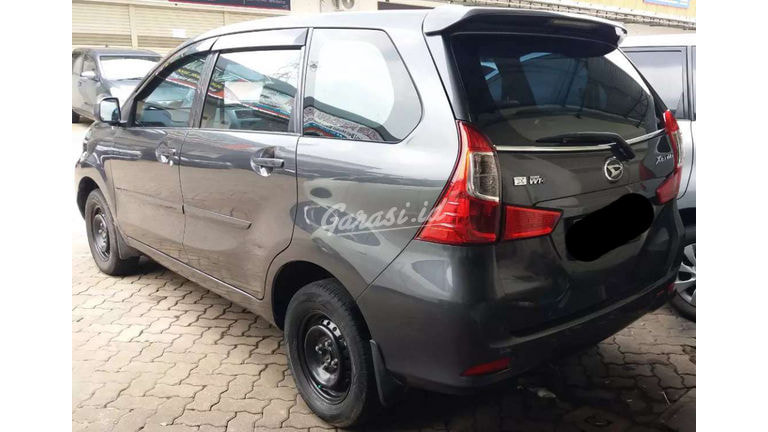

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Prediction:  toyota avanza


In [0]:
im = Image.open(os.path.join(os.getcwd(), 'gdrive', 'My Drive', 'Car Classification', 'test_img.jpeg'))
display(im)

y_pred = do_inference(model, os.path.join(os.getcwd(), 'gdrive', 'My Drive', 'Car Classification', 'test_img.jpeg'))
print('Prediction: ', num_to_models[y_pred[0]])

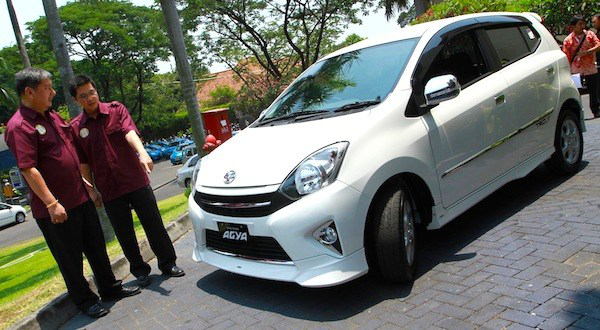

Prediction:  toyota agya


In [0]:
im = Image.open(os.path.join(os.getcwd(), 'gdrive', 'My Drive', 'Car Classification', 'test_img2.jpeg'))
display(im)

y_pred = do_inference(model, os.path.join(os.getcwd(), 'gdrive', 'My Drive', 'Car Classification', 'test_img2.jpeg'))
print('Prediction: ', num_to_models[y_pred[0]])

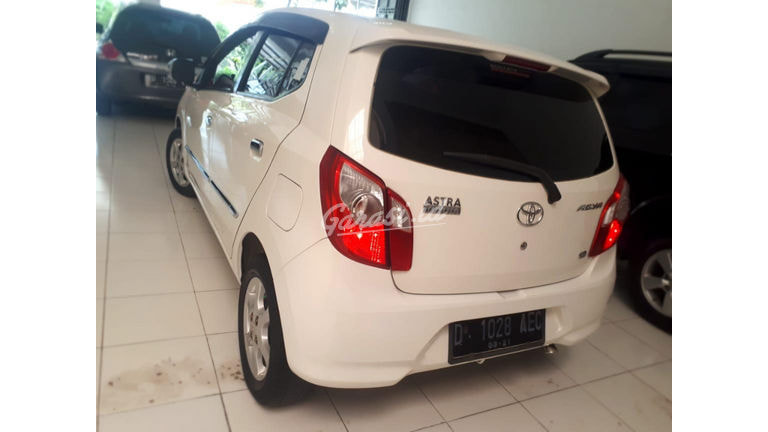

Prediction:  daihatsu ayla


In [0]:
im = Image.open(os.path.join(os.getcwd(), 'gdrive', 'My Drive', 'Car Classification', 'test_img3.jpeg'))
display(im)

y_pred = do_inference(model, os.path.join(os.getcwd(), 'gdrive', 'My Drive', 'Car Classification', 'test_img3.jpeg'))
print('Prediction: ', num_to_models[y_pred[0]])

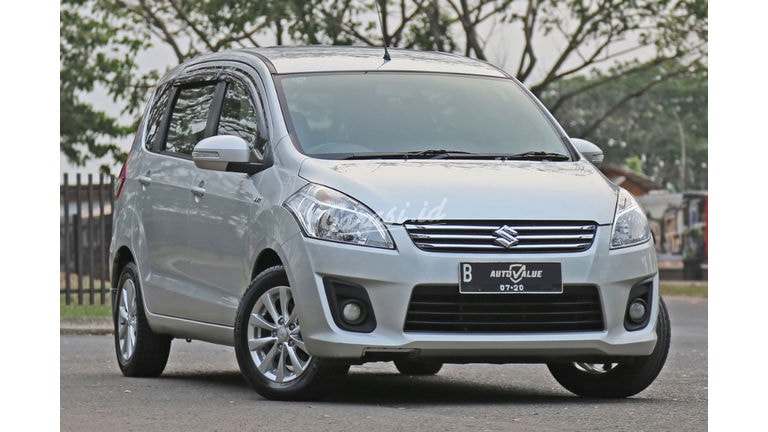

Prediction:  suzuki ertiga


In [0]:
im = Image.open(os.path.join(os.getcwd(), 'gdrive', 'My Drive', 'Car Classification', 'test_img4.jpeg'))
display(im)

y_pred = do_inference(model, os.path.join(os.getcwd(), 'gdrive', 'My Drive', 'Car Classification', 'test_img4.jpeg'))
print('Prediction: ', num_to_models[y_pred[0]])